# Primer Examen Parcial
## Donaldo Alfredo Garrido Islas - A01275416

En el conjunto de datos con que trabajarás hay 1372 registros que corresponden a distintas mediciones que se les hacen a las imágenes de billetes de banco, por ejemplo, el peso mexicano o el euro. Hay cuatro variables predictoras: varianza, asimetría, curtosis y entropía. La variable a predecir se codifica como 0 (auténtico) o 1 (falso). Los datos están en este archivo: `data_banknote.csv`

### 1. Importa la base de datos como un “data frame”.

In [32]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree

#Imports for metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
bankNote = pd.read_csv('data_banknote.csv') #Read the CSV file.
bankNote.head() #Look  at the first 5 rows of the DataFrame.

,variance,skewness,kurtosis,entropy,label
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
bankNote.describe() #Get some statistics of the columns in the DataFrame.
#In this table, we can see inconsistencies in the data.

,variance,skewness,kurtosis,entropy,label
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### 2. Crea un conjunto de entrenamiento y otro de prueba tomando como variable de salida a "label".

In [10]:
y = bankNote['label'] #Separate the results (label)
x = bankNote.copy() #Copy complete the DataFrame
x = x.drop(columns='label') # Eliminate 'label' column from the new DF

In [11]:
y #Inspect y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: label, Length: 1372, dtype: int64

In [12]:
x #inspect x

,variance,skewness,kurtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [14]:
#Use the train_test_split method from the scikit-learn library with the proportion 80-20

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

#random_state: Controls the shuffling applied to the data before applying the split. 
#Pass an int for reproducible output across multiple function calls.

In [15]:
Stat_shapes = 'x_train and x_test has been created with shapes {} and {}, respectively'
print(Stat_shapes.format(x_train.shape,x_test.shape))

x_train and x_test has been created with shapes (1097, 4) and (275, 4), respectively


In [16]:
Stat_shapes = 'y_train and y_test has been created with shapes {} and {}, respectively'
print(Stat_shapes.format(y_train.shape,y_test.shape))

y_train and y_test has been created with shapes (1097,) and (275,), respectively


### 3. Implementa un clasificador

In [20]:
#Create and train the model
model_classifier = tree.DecisionTreeClassifier().fit(x_train,y_train)

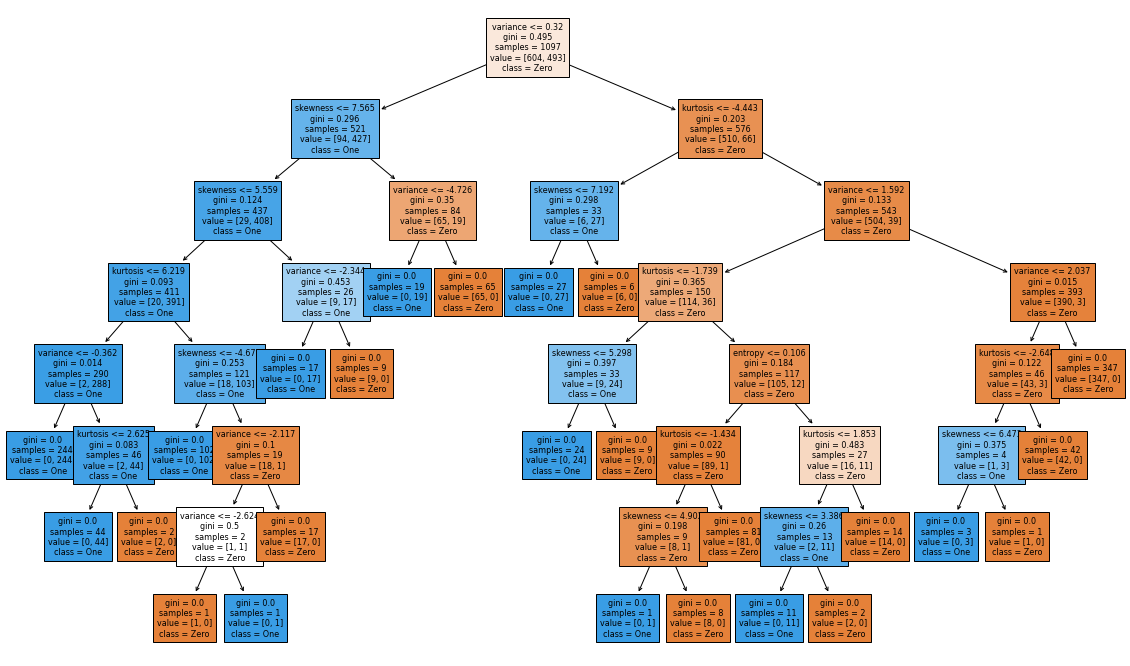

In [23]:
#Let's visualize the Decision Classification Tree

variables = x_train.columns #Obtain the columns
plt.figure(figsize=[20,12]) #Size of the figure

#Plot the figure, set the name of the results as 'Zero' or 'One'
tree.plot_tree(model_classifier, feature_names=variables, class_names=['Zero', 'One'], fontsize=8, filled=True)
plt.show()

In [25]:
#We apply our model to the x_test to predict the results
y_pred = model_classifier.predict(x_test)

### 4. Evalúa el modelo implementado utilizando tres métricas y reporta tus resultados. ¿Es bueno el modelo?

In [27]:
#We can calculate the accuracy rustically
well_predicted = sum(y_pred == y_test) #Every time the prediction and the test result is the same, we sum
accuracy = well_predicted / len(y_test) #Obtain the accuracy dividing the matches by the total
Stat_accuracy = 'The accuracy obtained by the model is {}'
print(Stat_accuracy.format(accuracy))

The accuracy obtained by the model is 0.9963636363636363


In [30]:
#Or we can calculate the accuracy with the corresponding metrics
accuracy_score(y_test, y_pred)

0.9963636363636363

In [33]:
#Just for fun, we can see the confusion matrix
confusion_matrix(y_test, y_pred)

array([[157,   1],
       [  0, 117]])

Con base en los resultados obtenidos en las métricas implementadas anteriormente, podemos decir que el modelo se comportó de una manera muy precisa, logrando pocos errores en las predicciones. Un 0.9963 en el accuracy es un resultado muy bueno, además de que en la matriz de confusión vemos que solo hubo un error. Por lo tanto **el modelo es bueno**.